In [1]:
from HEADER_SCRIPTS import *

In [2]:
C = CONSTANTS()

In [3]:
PREDICTOR_VARS = ["t2m"]
TARGET_VARS = ["t2m"]
TARG_VAR="t2m" #for smartinit - should match at least one entry in TARGET_VARS

In [4]:
model_1_attrs = DefineModelAttributes(is_train=False)#, with_terrains=["hrrr","urma","diff"])
model_1_filename = f"{C.DIR_TRAINED_MODELS}/ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP.pt"
model_1_attrs.set_model_attrs_from_savename(model_1_filename)

### Change as needed
# model_1_attrs.predictor_vars = PREDICTOR_VARS
# model_1_attrs.target_vars = TARGET_VARS

model_1_attrs.create_save_name()

model_1_attrs.savename = f"ATTENTION_SIMPLE_{model_1_attrs.savename}_TEMP"

model_1_attrs.create_dataset()

Making dataset for model ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP
is_train = False
Terrain normalization done for ['diff']
Predictor data for t2m loaded. Time taken = 0.0 sec
Target data for t2m loaded. Time taken = 0.0 sec
DATASET CONSTRUCTION DONE


In [5]:
model_2_attrs = DefineModelAttributes(is_train=False)#, with_terrains=["hrrr","urma","diff"])
model_2_filename = f"{C.DIR_TRAINED_MODELS}/BS24_NE50_tD_pred(t2m)_targ(t2m).pt"
model_2_attrs.set_model_attrs_from_savename(model_2_filename)

### Change as needed
# model_2_attrs.predictor_vars = PREDICTOR_VARS
# model_2_attrs.target_vars = TARGET_VARS

model_2_attrs.create_save_name()

model_2_attrs.create_dataset()

Making dataset for model BS24_NE50_tD_pred(t2m)_targ(t2m)
is_train = False
Terrain normalization done for ['diff']
Predictor data for t2m loaded. Time taken = 0.2 sec
Target data for t2m loaded. Time taken = 0.0 sec
DATASET CONSTRUCTION DONE


In [6]:
statsobj_model_1 = ConstructStatObject(is_smartinit=False, current_model_attrs=model_1_attrs, target_var=TARG_VAR)
statsobj_model_1.calc_domain_avg_RMSE_alltimes()

Calculating RMSE for all times (t2m, ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP)
0% done
5% done
10% done
15% done
20% done
25% done
30% done
35% done
40% done
45% done
50% done
55% done
60% done
65% done
70% done
75% done
80% done
85% done
90% done
95% done
100% done


In [7]:
statsobj_model_2 = ConstructStatObject(is_smartinit=False, current_model_attrs=model_2_attrs, target_var=TARG_VAR)
statsobj_model_2.calc_domain_avg_RMSE_alltimes()

Calculating RMSE for all times (t2m, BS24_NE50_tD_pred(t2m)_targ(t2m))
0% done
5% done
10% done
15% done
20% done
25% done
30% done
35% done
40% done
45% done
50% done
55% done
60% done
65% done
70% done
75% done
80% done
85% done
90% done
95% done
100% done


In [8]:
statsobj_smartinit = ConstructStatObject(is_smartinit=True, target_var=TARG_VAR)
statsobj_smartinit.calc_domain_avg_RMSE_alltimes()

t2m RMSE data for Smartinit exists on disk
t2m RMSE data has been read in


In [9]:
SAVE_BOOL=False

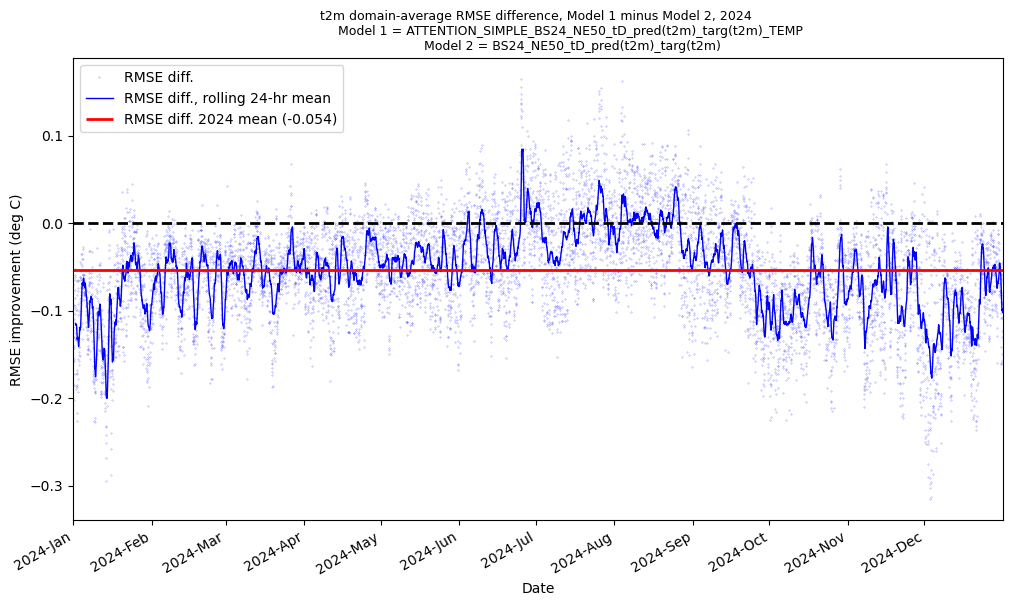

In [10]:
plot_model_vs_model_RMSE(model_1_attrs,
                         model_2_attrs,
                         statsobj_model_1, 
                         statsobj_model_2,
                         TARG_VAR=TARG_VAR,
                         units_str=statsobj_model_1.varname_units_dict[TARG_VAR], 
                         to_save=SAVE_BOOL,
                         PLOT_SAVE_DIR=f"/scratch/RTMA/alex.schein/Graz_presentation_figs/")

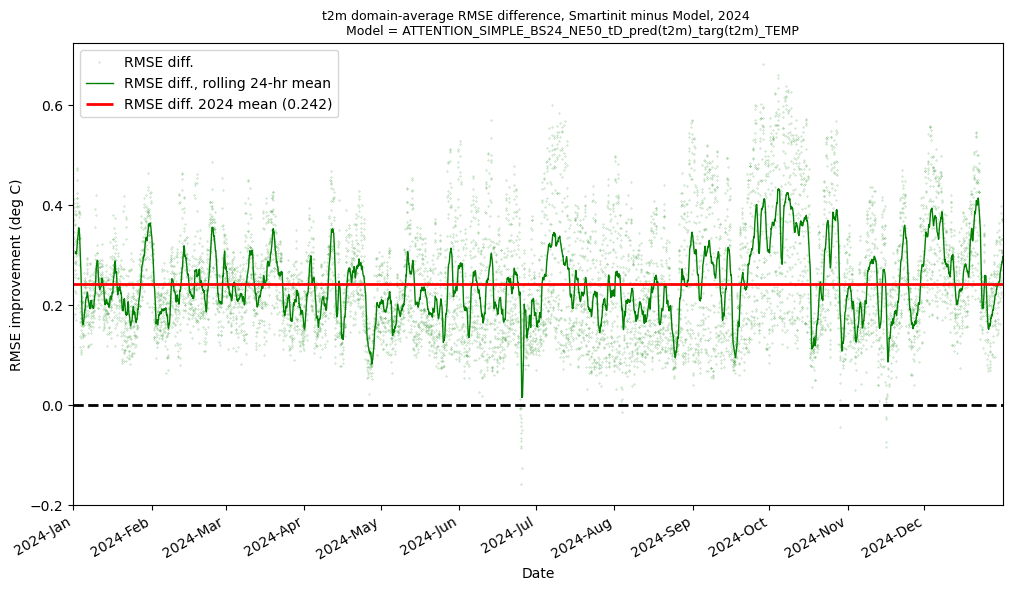

In [11]:
plot_model_vs_smartinit_RMSE(model_1_attrs,
                             statsobj_model_1,
                             statsobj_smartinit,
                             units_str=statsobj_smartinit.varname_units_dict[TARG_VAR],
                             to_save=SAVE_BOOL, 
                             PLOT_SAVE_DIR=f"/scratch/RTMA/alex.schein/Graz_presentation_figs/")

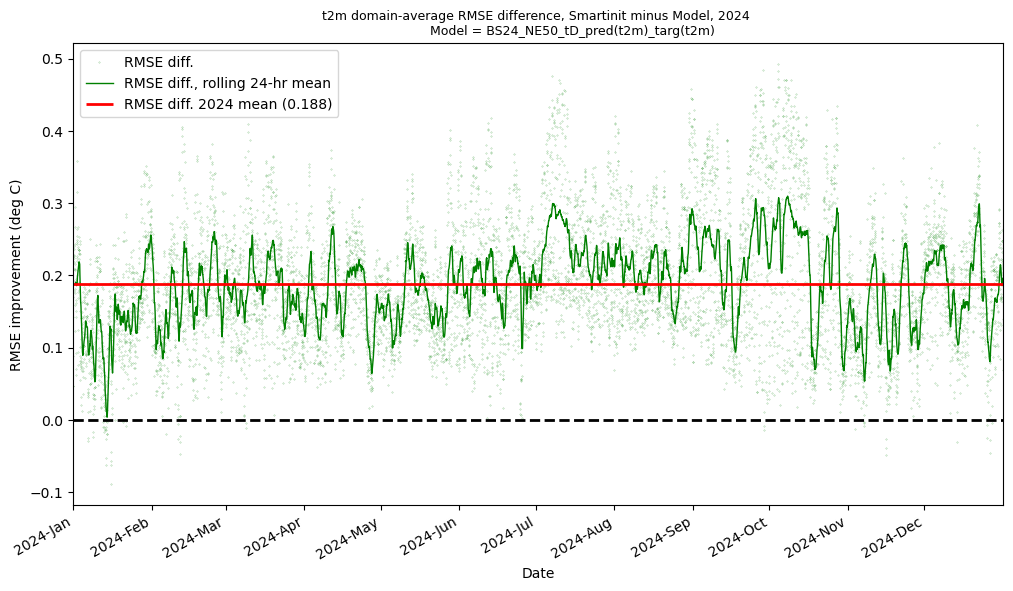

In [12]:
plot_model_vs_smartinit_RMSE(model_2_attrs,
                             statsobj_model_2,
                             statsobj_smartinit,
                             units_str=statsobj_smartinit.varname_units_dict[TARG_VAR],
                             to_save=SAVE_BOOL,
                             PLOT_SAVE_DIR=f"/scratch/RTMA/alex.schein/Graz_presentation_figs/")